# Factum

Factum is a simple framework for computational DAG composition and execution. 

A `Fact` is like a lazy actor. A `Fact` is a function with 2 things:
1. knowledge of its own inputs an how to gather them when called, and
2. memory of its own ouput, and the knowledge of when it becomes expired.



In [1]:
from factum import Fact

step 1: write some functions

In [2]:
def a_node(self, **kwargs):
    print('A running!')
    return 1

def b_node(self, **kwargs):
    print('B running!')
    if hasattr(self, 'current_state'):
        self.current_state += 1
    else:
        self.current_state = 0
    return self.current_state

def c_node(self, **kwargs):
    print('C running!')
    return kwargs['A'] + kwargs['B']

def d_node(self, **kwargs):
    return self._transformation(**kwargs)

def _transformation(self, cthing, **kw):
    print('D running!')
    return cthing + 1

step 2: wrap the function as a fact using `Fact(function, inputs, name)` (see also @fact decorator)

In [3]:
a = Fact(a_node)
b = Fact(b_node, None, 'Beta')
c = Fact(c_node, {'A': a, 'B': b})
d = Fact(d_node, {'cthing': c})
d.add_method(_transformation)

step 3: visualize the dag at any node

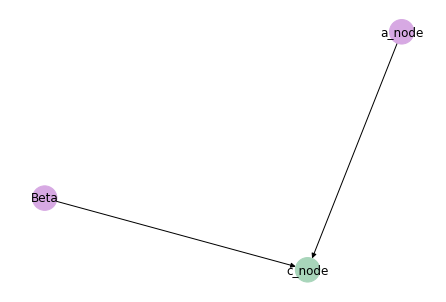

In [4]:
c.visualize()

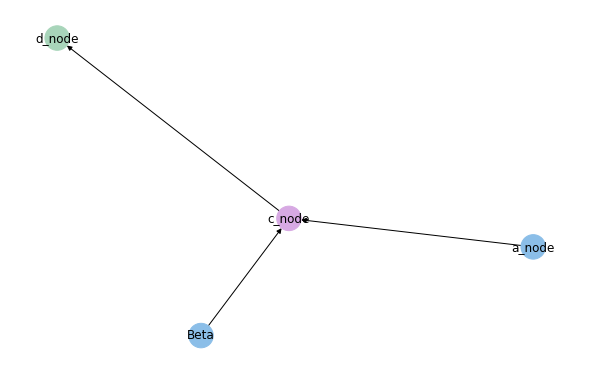

In [5]:
d.visualize()

step 4. run the dag, let it handle knowing which ones need to run

In [6]:
d.run()

A running!
B running!
C running!
D running!


2

In [7]:
# cached
d.run()

2

In [8]:
# give it gas to run it's calculations if it should
d.run(gas=1)

2

In [9]:
# give it gas to run it's calculations and tell it to use it
d.run(1, force=True)

D running!


2

In [10]:
# tell it to tell its inputs to run their calculations too...
d.run(2, force=True)

C running!
D running!


2

In [11]:
# force the entire network to refresh...
d.run(-1)

A running!
B running!
C running!
D running!


3

In [12]:
# getting cache again with gas
d.run(4)

3

In [13]:
# update the ouput value of a fact's 
b.run(-1)

B running!


2

In [14]:
# automatically uses gas when necessary: re-runs downstream of latest fact change
d.run(gas=10)

C running!
D running!


4

In [15]:
Fact?